In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image
from io import BytesIO

In [3]:
import os

In [4]:
# get the link from the dropbox shared options
# make sure to change the end to ?dl=1  as opposed to ?dl=0
os.system('curl -L -o download.zip https://www.dropbox.com/sh/4iuepfh5ox4visd/AABaJeZnnVl1JRNU-cxnRatPa?dl=1')

0

In [5]:
import zipfile

In [6]:
with zipfile.ZipFile('download.zip') as zf:
    print(zf.namelist())
    last_filename=zf.namelist()[-1]  # assuming the images are sorted by time - need to make this more robust

['/', 'Photo Oct 29, 09 25 19.jpg']


In [7]:
print("Loading ",last_filename)
with zipfile.ZipFile('download.zip') as zf:
    image_data = zf.read(last_filename)
    fh = BytesIO(image_data)
    img = Image.open(fh).rotate(-90)  # seems to be transposed
    arr=array(img)

Loading  Photo Oct 29, 09 25 19.jpg


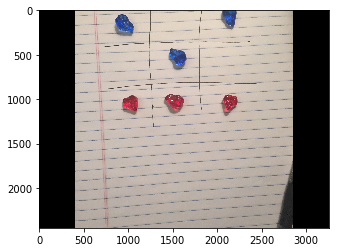

In [8]:
imshow(arr)

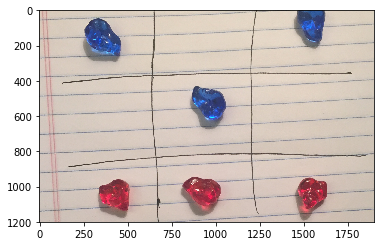

In [9]:
board_image=arr[:1200,600:2500]
imshow(board_image)

In [40]:
num_rows=3
num_cols=3

im_rows,im_cols=board_image.shape[:2]

# length of one square
Lr=im_rows//num_rows
Lc=im_cols//num_cols

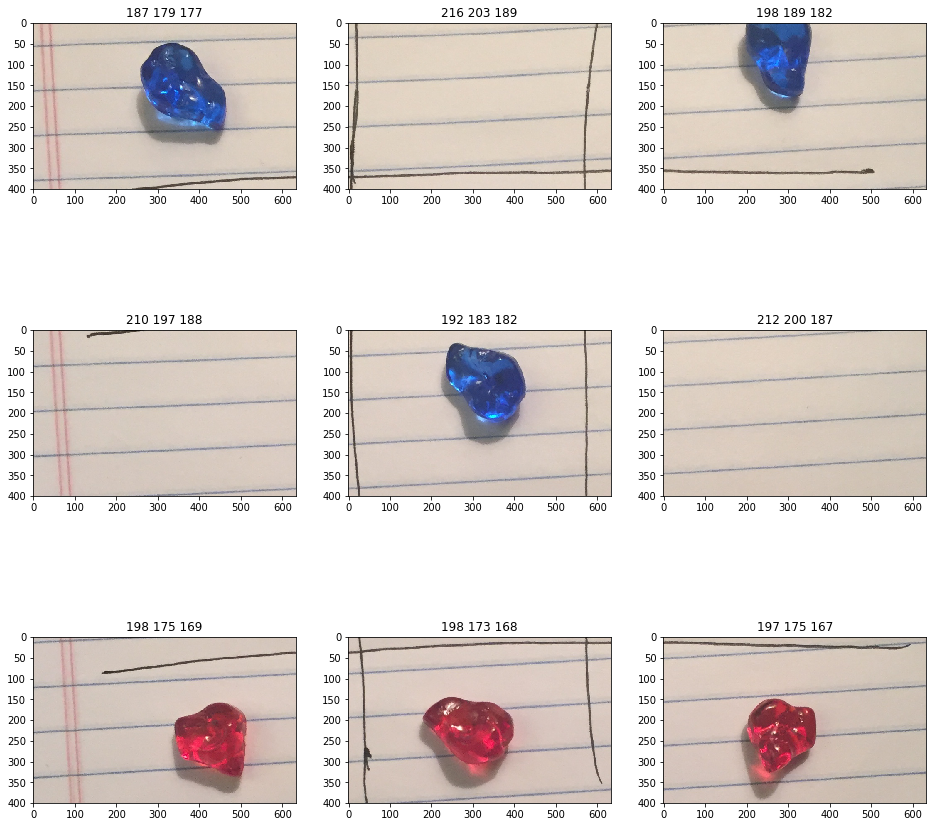

In [47]:
figure(figsize=(16,16))
count=1
for r in range(num_rows):
    for c in range(num_cols):
        subplot(num_rows,num_cols,count)
        sub_image=board_image[Lr*r:Lr*(r+1),
                       Lc*c:Lc*(c+1),
                       :]
        imshow(sub_image)
        title('%d %d %d' % (sub_image[:,:,0].mean(),sub_image[:,:,1].mean(),sub_image[:,:,2].mean()))
        count+=1